In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path
import json


READING RAW JSON FILES

In [52]:
#reading json files from raw_data folder
try:
    raw_movies_json_folder = Path('../raw_data')
    json_files = raw_movies_json_folder.glob('*.json')

    all_movies = []

    for file in json_files:
        with open(file, "r", encoding="utf-8") as f:
            movie = json.load(f)
            all_movies.append(movie)

    main_movies_df = pd.DataFrame(all_movies)
    movies_df = main_movies_df.copy()
except Exception as e:
    logging.error(f"Error: {e}")


DROPPING IRRELEVANT COLUMNS

In [53]:
def drop_irrelevant_columns(movies_df):
    try:
        #dropping unwanted columns
        drop_columns = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
        movies_df = movies_df.drop(columns=drop_columns, errors='ignore')
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"

movies_df = drop_irrelevant_columns(movies_df)
movies_df


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,"{'id': 386382, 'name': 'Frozen Collection', 'p...",150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",109445,[US],en,Young princess Anna of Arendelle dreams about ...,19.39,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,2013-11-20,1274219009,102,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the act of true love will thaw a frozen h...,Frozen,7.25,17188,"{'cast': [{'adult': False, 'gender': 1, 'id': ..."
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",16.07,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,2011-07-12,1341511219,130,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.08,21461,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,[US],en,Twenty-two years after the events of Jurassic ...,10.27,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,2015-06-06,1671537444,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,6.70,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,[US],en,Thirty years after defeating the Galactic Empi...,7.34,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.30,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,18.04,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,2015-04-01,1515400000,139,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",Released,Vengeance hits home.,Furious 7,7.22,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
5,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",181808,[US],en,Rey develops her newly discovered abilities wi...,6.82,/ySaaKHOLAQU5HoZqWmzDIj1VvZ1.jpg,...,2017-12-13,1332698830,152,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the Past Die,Star Wars: The Last Jedi,6.76,15928,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
6,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",35.83,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.59,32878,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,[US],en,When an unexpected enemy emerges and threatens...,46.36,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,2012-04-25,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,7.87,34316,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
8,/mabuNsGJgRuCTuGqjFkWe1xdu19.jpg,"{'id': 468222, 'name': 'The Incredibles Collec...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",260513,[US],en,Elastigi

EVALUATING JSON-LIKE COLUMNS, EXTRACTING AND CLEANING KEY DATA POINTS

In [54]:
def extract_name(value, key="name"):
    try:
        # Already processed (string)
        if isinstance(value, str):
            return value

        # Case 1: List of dicts
        if isinstance(value, list):
            values = [item.get(key, "") for item in value if isinstance(item, dict)]
            return "|".join(values)

        # Case 2: Single dict
        if isinstance(value, dict):
            return value.get(key, "")

        # Anything else → treat as empty
        return np.nan
    except Exception as e:
        logging.error(f"Error extracting names: {e}")
        return "Error occured"


EXTRACTING NAME FROM COLUMNS

In [55]:
def extracting_name_from_columns(movies_df):
    try:
        columns = [
            'belongs_to_collection',
            'genres', 
            'production_countries', 
            'production_companies', 
            'spoken_languages'
        ]

        for column in columns:
            movies_df[column] = movies_df[column].apply(
                lambda value: extract_name(value)
            )

        return movies_df
    except Exception as e:
        logging.error(f"Error extracting names: {e}")
        return "Error occured"

extracting_name_from_columns(movies_df)

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,Frozen Collection,150000000,Animation|Family|Adventure|Fantasy,109445,[US],en,Young princess Anna of Arendelle dreams about ...,19.39,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,2013-11-20,1274219009,102,English,Released,Only the act of true love will thaw a frozen h...,Frozen,7.25,17188,"{'cast': [{'adult': False, 'gender': 1, 'id': ..."
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",16.07,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,2011-07-12,1341511219,130,English,Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.08,21461,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,10.27,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,2015-06-06,1671537444,124,English,Released,The park is open.,Jurassic World,6.70,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.34,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.30,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,18.04,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,2015-04-01,1515400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.22,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
5,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,Star Wars Collection,300000000,Adventure|Action|Science Fiction,181808,[US],en,Rey develops her newly discovered abilities wi...,6.82,/ySaaKHOLAQU5HoZqWmzDIj1VvZ1.jpg,...,2017-12-13,1332698830,152,English,Released,Let the Past Die,Star Wars: The Last Jedi,6.76,15928,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
6,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",35.83,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,2009-12-15,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.59,32878,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,46.36,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,2012-04-25,1518815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.87,34316,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
8,/mabuNsGJgRuCTuGqjFkWe1xdu19.jpg,The Incredibles Collection,200000000,Action|Adventure|Animation|Family,260513,[US],en,Elastigirl springs into action to save the day...,8.84,/9lFKBtaVIhP7E2Pk0IY1CwTKTMZ.jpg,...,2018-06-14,1243225667,118,English,Released,"It's been too long, dahlings.",Incredibles 2,7.46,13372,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
9,/AlFqBwJnokrp9zWTXOUv7uhkaeq.jpg,Black Panther Collection,200000000,Action|Adventure|Science Fiction,284054,[US],en,"King T'Challa returns home to the reclusive, t...",8.43,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,...,2018-02-13,1349926083,135,English|한국어/조선말|Kiswahili|,Released,Long live the king.,Black Panther,7.37,22977,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


CHECKING ANOMALIES USING VALUE_COUNTS()

In [56]:
def check_anomalies(movies_df):
    try:
        columns = ['genres', 'spoken_languages', 
                'production_companies', 
                'production_countries', 
                'belongs_to_collection']
        
        result = {}
        for col in columns:
            # value_counts shows the top values including NaN
            result[col] = [movies_df[col].value_counts()]
        return result
    except Exception as e:
        logging.error(f"Error checking anomalies: {e}")
        return "Error occured"
        

check_anomalies(movies_df)

{'genres': [genres
  Adventure|Action|Science Fiction             3
  Action|Adventure|Science Fiction|Thriller    2
  Action|Adventure|Science Fiction             2
  Adventure|Fantasy                            1
  Action|Crime|Thriller                        1
  Animation|Family|Adventure|Fantasy           1
  Action|Adventure|Fantasy|Science Fiction     1
  Science Fiction|Action|Adventure             1
  Action|Adventure|Animation|Family            1
  Adventure|Science Fiction|Action             1
  Family|Fantasy|Romance                       1
  Family|Animation|Adventure|Comedy|Fantasy    1
  Adventure|Drama|Family|Animation             1
  Drama|Romance                                1
  Name: count, dtype: int64],
 'spoken_languages': [spoken_languages
  English                                              9
  العربية|English|Español|ภาษาไทย                      1
  English|Español                                      1
  English|हिन्दी|Pусский                               

HANDLING MISSING & INCORRECT DATA

In [57]:
def convert_column_datatypes(movies_df):
    try:
        numeric_cols = ['budget', 'revenue', 'popularity', 'id', 'vote_count', 'vote_average', 'runtime']
        for col in numeric_cols:
            movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')
        
        movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"
        
convert_column_datatypes(movies_df).head()


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,Frozen Collection,150000000,Animation|Family|Adventure|Fantasy,109445,[US],en,Young princess Anna of Arendelle dreams about ...,19.39,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,2013-11-20,1274219009,102,English,Released,Only the act of true love will thaw a frozen h...,Frozen,7.25,17188,"{'cast': [{'adult': False, 'gender': 1, 'id': ..."
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",16.07,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,2011-07-12,1341511219,130,English,Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.08,21461,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,10.27,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,2015-06-06,1671537444,124,English,Released,The park is open.,Jurassic World,6.70,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.34,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.30,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,18.04,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,2015-04-01,1515400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.22,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


REPLACING UNREALISTIC VALUES

In [58]:
def replacing_unrealistic_values(movies_df):
    try:
        # 1. Replace unrealistic values (budget, revenue, runtime = 0 → NaN)
        for col in ['budget', 'revenue', 'runtime']:
            movies_df[col] = movies_df[col].replace(0, np.nan)

        # 2. Convert budget and revenue to millions
        movies_df['budget_musd'] = movies_df['budget'] / 1_000_000
        movies_df['revenue_musd'] = movies_df['revenue'] / 1_000_000
        
        # 3. Handle vote_count = 0
        movies_df.loc[movies_df['vote_count'] == 0, 'vote_average'] = np.nan

        # 4. Replace overview and tagline placeholders
        placeholders = ["No Data", "", "N/A", "na", "null"]
        for item in ['overview', 'tagline']:
            movies_df[item] = movies_df[item].replace(placeholders, np.nan)
            
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"
replacing_unrealistic_values(movies_df).tail()


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits,budget_musd,revenue_musd
13,/AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg,Frozen Collection,150000000,Family|Animation|Adventure|Comedy|Fantasy,330457,[US],en,"Elsa, Anna, Kristoff and Olaf head far into th...",10.23,/mINJaa34MtknCYl5AjtNJzWj8cD.jpg,...,103,English,Released,The past is not what it seems.,Frozen II,7.24,10077,"{'cast': [{'adult': False, 'gender': 1, 'id': ...",150.00,"1,453.68"
14,/gBmrsugfWpiXRh13Vo3j0WW55qD.jpg,Jurassic Park Collection,170000000,Action|Adventure|Science Fiction|Thriller,351286,[US],en,Three years after Jurassic World was destroyed...,8.87,/x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg,...,129,English|Pусский,Released,The park is gone.,Jurassic World: Fallen Kingdom,6.54,12413,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",170.00,"1,310.47"
15,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.28,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,118,English,Released,The king has returned.,The Lion King,7.10,10571,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",260.00,"1,662.02"
16,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,27.22,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.90,26519,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.00,"2,264.16"
17,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,11.12,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.27,23881,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",235.00,"1,405.40"


REMOVE DUPLICATES AND DROP ROWS WITH UNKNOWN 'ID' OR 'TITLES'

In [59]:
def clean_movies(movies_df):
    # Remove duplicates based on 'id' and 'title' 
    # Drop rows with unknown 'id' or 'title'
    # Keep rows with at least 10 non-NaN columns
    try:
        movies_df = movies_df.drop_duplicates(subset=['id', 'title'], keep='first')\
                    .dropna(subset=['id', 'title'])\
                    .dropna(thresh=10)
        
        # Keep only 'Released' movies and drop the 'status' column
        movies_df = movies_df[movies_df['status'] == 'Released'].drop(columns=['status'])
        
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"
clean_movies(movies_df).tail()

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,credits,budget_musd,revenue_musd
13,/AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg,Frozen Collection,150000000,Family|Animation|Adventure|Comedy|Fantasy,330457,[US],en,"Elsa, Anna, Kristoff and Olaf head far into th...",10.23,/mINJaa34MtknCYl5AjtNJzWj8cD.jpg,...,1453683476,103,English,The past is not what it seems.,Frozen II,7.24,10077,"{'cast': [{'adult': False, 'gender': 1, 'id': ...",150.00,"1,453.68"
14,/gBmrsugfWpiXRh13Vo3j0WW55qD.jpg,Jurassic Park Collection,170000000,Action|Adventure|Science Fiction|Thriller,351286,[US],en,Three years after Jurassic World was destroyed...,8.87,/x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg,...,1310469037,129,English|Pусский,The park is gone.,Jurassic World: Fallen Kingdom,6.54,12413,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",170.00,"1,310.47"
15,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.28,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,1662020819,118,English,The king has returned.,The Lion King,7.10,10571,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",260.00,"1,662.02"
16,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,27.22,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Nothing on earth could come between them.,Titanic,7.90,26519,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.00,"2,264.16"
17,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,11.12,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,1405403694,141,English,A new age has come.,Avengers: Age of Ultron,7.27,23881,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",235.00,"1,405.40"


REORDER & FINALIZE DATAFRAME

Extracting Cast and Crews

In [60]:
def extract_cast_and_crew(df):
    try:
        # Extract cast names
        df["cast"] = df["credits"].apply(
            lambda x: "|".join([c["name"] for c in x.get("cast", [])]) if isinstance(x, dict) else None
        )

        # Cast size
        df["cast_size"] = df["credits"].apply(
            lambda x: len(x.get("cast", [])) if isinstance(x, dict) else 0
        )

        # Extract director name(s)
        df["director"] = df["credits"].apply(
            lambda x: "|".join([c["name"] for c in x.get("crew", []) if c.get("job") == "Director"])
            if isinstance(x, dict) else None
        )

        # Crew size
        df["crew_size"] = df["credits"].apply(
            lambda x: len(x.get("crew", [])) if isinstance(x, dict) else 0
        )

        return df
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"

        

extract_cast_and_crew(movies_df)



,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,title,vote_average,vote_count,credits,budget_musd,revenue_musd,cast,cast_size,director,crew_size
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,Frozen Collection,150000000,Animation|Family|Adventure|Fantasy,109445,[US],en,Young princess Anna of Arendelle dreams about ...,19.39,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,Frozen,7.25,17188,"{'cast': [{'adult': False, 'gender': 1, 'id': ...",150.00,"1,274.22",Idina Menzel|Kristen Bell|Jonathan Groff|Josh ...,60,Jennifer Lee|Chris Buck,285
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",16.07,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,Harry Potter and the Deathly Hallows: Part 2,8.08,21461,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",125.00,"1,341.51",Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,105,David Yates,159
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,10.27,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Jurassic World,6.70,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",150.00,"1,671.54",Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,53,Colin Trevorrow,426
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.34,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Star Wars: The Force Awakens,7.30,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",245.00,"2,068.22",Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,18.04,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,Furious 7,7.22,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",190.00,"1,515.40",Vin Diesel|Paul Walker|Jason Statham|Michelle ...,49,James Wan,227
5,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,Star Wars Collection,300000000,Adventure|Action|Science Fiction,181808,[US],en,Rey develops her newly discovered abilities wi...,6.82,/ySaaKHOLAQU5HoZqWmzDIj1VvZ1.jpg,...,Star Wars: The Last Jedi,6.76,15928,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",300.00,"1,332.70",Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ri...,111,Rian Johnson,218
6,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",35.83,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,Avatar,7.59,32878,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",237.00,"2,923.71",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,990
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,46.36,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,The Avengers,7.87,34316,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",220.00,"1,518.82",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,113,Joss Whedon,641
8,/mabuNsGJgRuCTuGqjFkWe1xdu19.jpg,The Incredibles Collection,200000000,Action|Adventure|Animation|Family,260513,[US],en,Elastigirl springs into action to save the day...,8.84,/9lFKBtaVIhP7E2Pk0IY1CwTKTMZ.jpg,...,Incredibles 2,7.46,13372,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.00,"1,243.23",Craig T. Nelson|Holly Hunter|Sarah Vowell|Huck...,84,Brad Bird,260
9,/AlFqBwJnokrp9zWTXOUv7uhkaeq.jpg,Black Panther Collection,200000000,Action|Adventure|Science Fiction,284054,[US],en,"King T'Challa returns home to the reclusive, t...",8.43,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,...,Black Panther,7.37,22977,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.00,"1,349.93",Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,66,Ryan Co

In [61]:
def reorder_columns(movie_df):
    try:
        ordered_columns = [
            'id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
            'original_language', 'budget_musd', 'revenue_musd', 'production_companies',
            'production_countries', 'vote_count', 'vote_average', 'popularity',
            'runtime', 'overview', 'spoken_languages', 'poster_path',
            'cast', 'cast_size', 'director', 'crew_size'
        ]

        
        # Keep only the columns that exist
        cols_present = [col for col in ordered_columns if col in movie_df.columns]
        
        movie_df = movies_df.reindex(columns=cols_present)
        return movie_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"
reorder_columns(movies_df).tail()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
13,330457,Frozen II,The past is not what it seems.,2019-11-20,Family|Animation|Adventure|Comedy|Fantasy,Frozen Collection,en,150.00,"1,453.68",Walt Disney Animation Studios,...,7.24,10.23,103,"Elsa, Anna, Kristoff and Olaf head far into th...",English,/mINJaa34MtknCYl5AjtNJzWj8cD.jpg,Idina Menzel|Kristen Bell|Josh Gad|Jonathan Gr...,64,Jennifer Lee|Chris Buck,41
14,351286,Jurassic World: Fallen Kingdom,The park is gone.,2018-06-06,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,en,170.00,"1,310.47",Amblin Entertainment|Universal Pictures,...,6.54,8.87,129,Three years after Jurassic World was destroyed...,English|Pусский,/x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg,Chris Pratt|Bryce Dallas Howard|Rafe Spall|Jus...,41,J.A. Bayona,384
15,420818,The Lion King,The king has returned.,2019-07-12,Adventure|Drama|Family|Animation,The Lion King (Reboot) Collection,en,260.00,"1,662.02",Walt Disney Pictures|Fairview Entertainment,...,7.10,8.28,118,"Simba idolizes his father, King Mufasa, and ta...",English,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,20,Jon Favreau,48
16,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200.00,"2,264.16",Paramount Pictures|20th Century Fox|Lightstorm...,...,7.90,27.22,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262
17,99861,Avengers: Age of Ultron,A new age has come.,2015-04-22,Action|Adventure|Science Fiction,The Avengers Collection,en,235.00,"1,405.40",Marvel Studios,...,7.27,11.12,141,When Tony Stark tries to jumpstart a dormant p...,English,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,74,Joss Whedon,652


KPI IMPLEMENTATION & ANALYSIS

USER- DEFINE FUNCTION TO STREAMLINE RANKING OPS

In [62]:
def rank_movies(df, by, top=True, n=10, condition=None, new_col_name=None):
    """
    Rank movies based on a column.
    
    Parameters:
        df (DataFrame): Movies dataframe
        by (str or list): Column(s) to sort by
        top (bool): True → highest values, False → lowest
        n (int): Number of rows to return
        condition (callable, optional): Function to filter df before ranking
        new_col_name (str, optional): Add a column to label KPI
    
    Returns:
        DataFrame: Top/bottom ranked movies
    """
    try:
        df_filtered = df if condition is None else df[condition(df)]
        ranked = df_filtered.sort_values(by=by, ascending=not top).head(n)
        if new_col_name:
            ranked = ranked.assign(KPI=new_col_name).round(2)
        return ranked
    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"



IDENTIFYING THE BEST/WORST PERFORMING MOVIES


In [63]:
# Highest/Lowest Revenue
highest_revenue = rank_movies(movies_df, by='revenue_musd', top=True, new_col_name='Highest Revenue')
lowest_revenue  = rank_movies(movies_df, by='revenue_musd', top=False, new_col_name='Lowest Revenue')
highest_revenue[['title', 'revenue']]

# Highest/Lowest Budget
highest_budget = rank_movies(movies_df, by='budget_musd', top=True, new_col_name='Highest Budget')
lowest_budget  = rank_movies(movies_df, by='budget_musd', top=False, new_col_name='Lowest Budget')

# Profit = Revenue - Budget
movies_df['profit'] = movies_df['revenue_musd'] - movies_df['budget_musd']
highest_profit = rank_movies(movies_df, by='profit', top=True, new_col_name='Highest Profit')
lowest_profit  = rank_movies(movies_df, by='profit', top=False, new_col_name='Lowest Profit')

# ROI = Revenue / Budget, only for Budget ≥ 10M
roi_condition = lambda df: df['budget_musd'] >= 10
movies_df['roi'] = movies_df['revenue_musd'] / movies_df['budget_musd']
highest_roi = rank_movies(movies_df, by='roi', top=True, condition=roi_condition, new_col_name='Highest ROI')
lowest_roi  = rank_movies(movies_df, by='roi', top=False, condition=roi_condition, new_col_name='Lowest ROI')

# Most Voted Movies
most_voted = rank_movies(movies_df, by='vote_count', top=True, new_col_name='Most Voted')

# Highest/Lowest Rated Movies (only movies with ≥ 10 votes)
rating_condition = lambda df: df['vote_count'] >= 10
highest_rated = rank_movies(movies_df, by='vote_average', top=True, condition=rating_condition, new_col_name='Highest Rated')
lowest_rated  = rank_movies(movies_df, by='vote_average', top=False, condition=rating_condition, new_col_name='Lowest Rated')

# Most Popular Movies
most_popular = rank_movies(movies_df, by='popularity', top=True, new_col_name='Most Popular')


OUTPUT FOR THE KPIS

In [64]:
all_kpis = pd.concat([
    highest_revenue, lowest_revenue, 
    highest_budget, lowest_budget,
    highest_profit, lowest_profit,
    highest_roi, lowest_roi,
    most_voted, highest_rated, lowest_rated,
    most_popular
], ignore_index=True)

all_kpis

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,credits,budget_musd,revenue_musd,cast,cast_size,director,crew_size,KPI,profit,roi
0,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",35.83,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",237.00,"2,923.71",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,990,Highest Revenue,NaN,NaN
1,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,14.07,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",356.00,"2,799.44",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,607,Highest Revenue,NaN,NaN
2,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,27.22,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.00,"2,264.16",Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262,Highest Revenue,NaN,NaN
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.34,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",245.00,"2,068.22",Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262,Highest Revenue,NaN,NaN
4,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,20.52,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",300.00,"2,052.42",Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo|Joe Russo,733,Highest Revenue,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,18.04,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",190.00,"1,515.40",Vin Diesel|Paul Walker|Jason Statham|Michelle ...,49,James Wan,227,Most Popular,"1,325.40",7.98
116,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",16.07,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",125.00,"1,341.51",Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,105,David Yates,159,Most Popular,"1,216.51",10.73
117,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,14.07,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",356.00,"2,799.44",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,607,Most Popular,"2,443.44",7.86
118,/uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg,NaN,160000000,Family|Fantasy|Romance,321612,[US],en,A live-action adaptation of Disney's version o...,11.42,/hKegSKIDep2ewJWPUQD7u0KqFIp.jpg,...,"{'cast': [{'adult': False, 'gender': 1, 'id': ...",160.00,"1,266.12",Emma Watson|Dan Stevens|Luke Evans|Josh Gad|Ke...,139,Bill Condon,158,Most Popular,"1,106.12",7.91


ADVANCED FILTERING & SEARCH QUERIES

In [65]:
def search_movies(df, title_contains=None, genre=None, year=None, director=None):
    try:
        query = df

        if title_contains:
            query = query[query['title'].str.contains(title_contains, case=False, na=False)]

        if genre:
            query = query[query['genres'].apply(lambda g: genre in g if isinstance(g, list) else False)]

        if year:
            query = query[query['release_date'].dt.year == year]

        if director:
            query = query[query['director'] == director]

        if query.empty:
            return "No matching query"

        return query

    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occured"
    

search_movies(movies_df, title_contains="Avengers", genre="Action", year=2019)



'No matching query'

3. Filter the dataset for specific queries

In [66]:
#Searching for best rated sci-fi action movies starring B.willis
def best_rated_sci_fi_movies(movies_df):
    try:
        filtered_df = movies_df[
            movies_df['genres'].str.contains("Science Fiction", case=False, na=False) &
            movies_df['genres'].str.contains("Action", case=False, na=False) &
            movies_df['cast'].str.contains("Bruce Willis", case=False, na=False)
        ].sort_values(by='vote_average', ascending=False)

        if not filtered_df.empty:
            return filtered_df
        else:
            return "No matching query"

    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occurred"

best_rated_sci_fi_movies(movies_df)

'No matching query'

In [67]:
#Searching miovies with starring Uma Thurman directed by Quentin Tarantino
def uma_thurman_tarantino_movies(movies_df):
    try:
        filtered_df = movies_df[
            movies_df['cast'].str.contains("Uma Thurman", case=False, na=False) &
            movies_df['director'].str.contains("Quentin Tarantino", case=False, na=False)
        ].sort_values(by='runtime', ascending=True)
        if not filtered_df.empty:
            return filtered_df
        else:
            return "No matching query"

    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occurred"

uma_thurman_tarantino_movies(movies_df)

'No matching query'

FRANCHISE VS STANDALONE MOVIE PERFORMANCE

4. Compare movie franchises (belongs_to_collection) vs. standalone movies in terms of:

Mean Revenue
Median ROI
Mean Budget Raised
Mean Popularity
Mean Rating

In [68]:
def franchise_vs_standalone_performance(df, decimals=2):
    try:
        pd.options.display.float_format = '{:,.2f}'.format
        # Create franchise vs standalone indicator
        df['franchise_type'] = df['belongs_to_collection'].notna().map({
            True: 'Franchise',
            False: 'Standalone'
        })

        # Group and aggregate
        summary = (
            df.groupby('franchise_type')
              .agg(
                  mean_revenue=('revenue_musd', 'mean'),
                  median_roi=('roi', 'median'),
                  mean_budget=('budget_musd', 'mean'),
                  mean_popularity=('popularity', 'mean'),
                  mean_rating=('vote_average', 'mean')
              )
        )

        # Sort (Franchise usually higher but just in case)
        summary = summary.sort_values(by='mean_revenue', ascending=False)

        return summary

    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occurred"

franchise_vs_standalone_performance(movies_df)


,mean_revenue,median_roi,mean_budget,mean_popularity,mean_rating
franchise_type,,,,,
Standalone,"1,765.14",9.62,180.00,19.32,7.44
Franchise,"1,682.67",7.79,218.00,15.66,7.39


MOST SUCCESSFUL FRANCHISE & DIRECTORS

5. Find the Most Successful Movie Franchises based on:

Total number of movies in franchise
Total & Mean Budget
Total & Mean Revenue
Mean Rating

In [69]:
def most_successful_franchises(df):
    try:
        df['collection_name'] = df['belongs_to_collection']
        franchise_df = df[df['collection_name'].notna()]

        franchise_stats = franchise_df.groupby('collection_name').agg(
            total_movies=('id', 'count'),
            total_budget=('budget_musd', 'sum'),
            mean_budget=('budget_musd', 'mean'),
            total_revenue=('revenue_musd', 'sum'),
            mean_revenue=('revenue_musd', 'mean'),
            mean_rating=('vote_average', 'mean')
        ).sort_values(by='mean_revenue', ascending=False)

        return franchise_stats

    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occurred"
most_successful_franchises(movies_df)

,total_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
collection_name,,,,,,
Avatar Collection,1,237.00,237.00,"2,923.71","2,923.71",7.59
The Avengers Collection,4,"1,111.00",277.75,"7,776.07","1,944.02",7.90
Star Wars Collection,2,545.00,272.50,"3,400.92","1,700.46",7.03
The Lion King (Reboot) Collection,1,260.00,260.00,"1,662.02","1,662.02",7.10
The Fast and the Furious Collection,1,190.00,190.00,"1,515.40","1,515.40",7.22
Jurassic Park Collection,2,320.00,160.00,"2,982.01","1,491.00",6.62
Frozen Collection,2,300.00,150.00,"2,727.90","1,363.95",7.25
Black Panther Collection,1,200.00,200.00,"1,349.93","1,349.93",7.37
Harry Potter Collection,1,125.00,125.00,"1,341.51","1,341.51",8.08


6. Find the Most Successful Directors based on:
Total Number of Movies Directed
Total Revenue
Mean Rating

In [70]:
def most_successful_directors(df):
    try:
        director_stats = df.groupby('director').agg(
            total_movies=('id', 'count'),
            total_revenue=('revenue_musd', 'sum'),
            mean_rating=('vote_average', 'mean')
        ).sort_values(by='total_revenue', ascending=False)

        return director_stats

    except Exception as e:
        logging.error(f"Error: {e}")
        return "Error occurred"
most_successful_directors(movies_df)


,total_movies,total_revenue,mean_rating
director,,,
James Cameron,2,"5,187.87",7.75
Anthony Russo|Joe Russo,2,"4,851.85",8.24
Joss Whedon,2,"2,924.22",7.57
Jennifer Lee|Chris Buck,2,"2,727.90",7.25
J.J. Abrams,1,"2,068.22",7.30
Colin Trevorrow,1,"1,671.54",6.70
Jon Favreau,1,"1,662.02",7.10
James Wan,1,"1,515.40",7.22
Ryan Coogler,1,"1,349.93",7.37


Step 4: DATA VISUALIZATION

Revenue vs Budget Trends


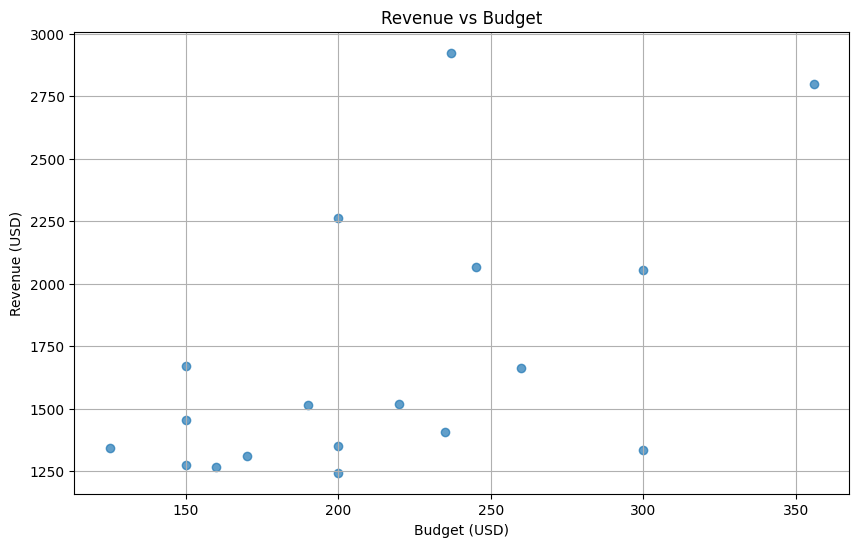

In [71]:
try:
    plt.figure(figsize=(10,6))
    plt.scatter(movies_df['budget_musd'], movies_df['revenue_musd'], alpha=0.7)
    plt.title('Revenue vs Budget')
    plt.xlabel('Budget (USD)')
    plt.ylabel('Revenue (USD)')
    plt.grid(True)
    plt.show()
except Exception as e:
    logging.error(f"Error: {e}")


ROI Distribution by Genre

<Figure size 1200x600 with 0 Axes>

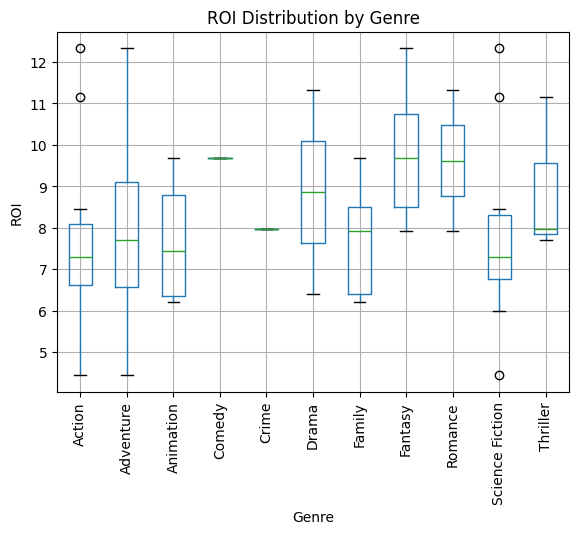

In [72]:
try:
    # explode genres first
    df_genres = movies_df
    df_genres['genres'] = df_genres['genres'].str.split('|')
    df_genres = df_genres.explode('genres')

    # plot ROI distribution
    plt.figure(figsize=(12,6))
    df_genres.boxplot(column='roi', by='genres', rot=90)
    plt.title("ROI Distribution by Genre")
    plt.suptitle("")
    plt.xlabel("Genre")
    plt.ylabel("ROI")
    plt.show()

except Exception as e:
    logging.error(f"Error: {e}")

Popularity vs. Rating

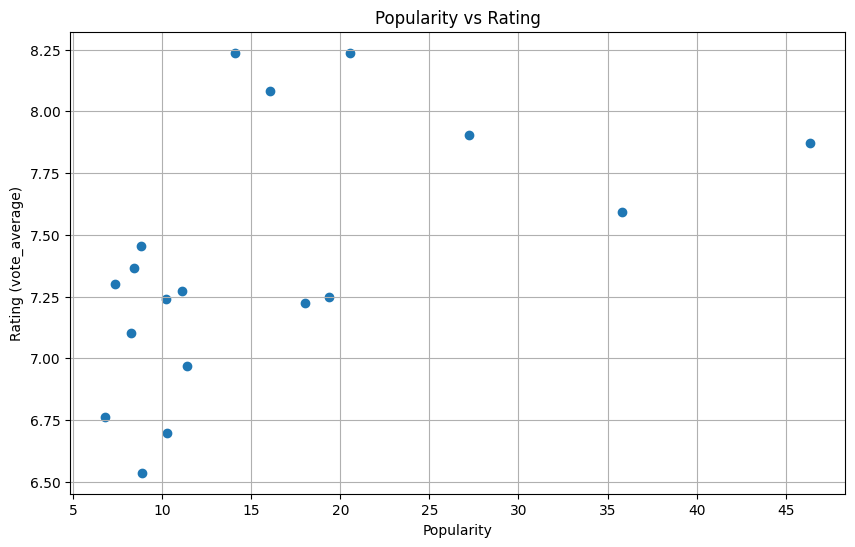

In [73]:
try:
    plt.figure(figsize=(10,6))
    plt.scatter(movies_df['popularity'], movies_df['vote_average'])
    plt.xlabel("Popularity")
    plt.ylabel("Rating (vote_average)")
    plt.title("Popularity vs Rating")
    plt.grid(True)
    plt.show()
except Exception as e:
    logging.error(f"Error: {e}")


Yearly Trends in Box Office Performance

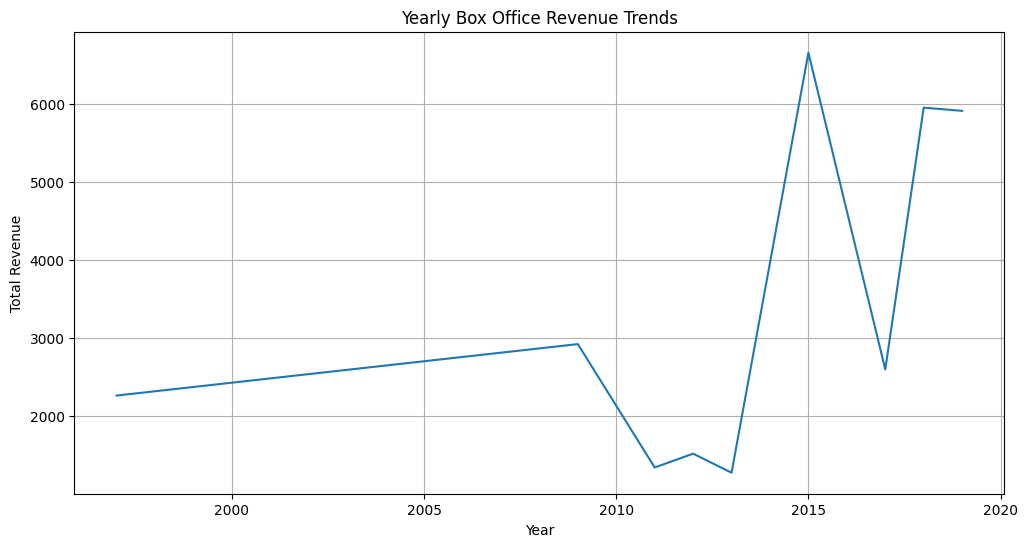

In [74]:
#Create a year column
try:
    movies_df['year'] = movies_df['release_date'].dt.year
    yearly = movies_df.groupby('year')['revenue_musd'].sum().reset_index()

    #Plot

    plt.figure(figsize=(12,6))
    plt.plot(yearly['year'], yearly['revenue_musd'])
    plt.xlabel("Year")
    plt.ylabel("Total Revenue")
    plt.title("Yearly Box Office Revenue Trends")
    plt.grid(True)
    plt.show()
except Exception as e:
    logging.error(f"Error: {e}")

Franchise vs Standalone Success

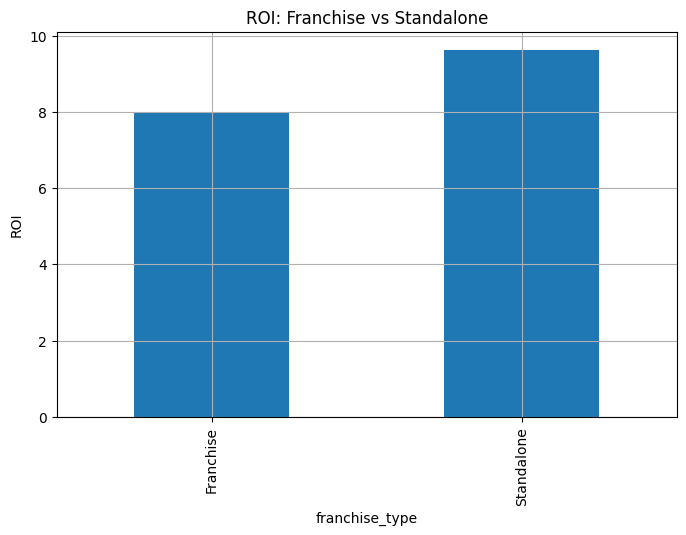

In [75]:

# Franchise vs Standalone Success
try:
    franchise_stats = movies_df.groupby('franchise_type')[['revenue_musd', 'roi', 'budget_musd']].mean()
    plt.figure(figsize=(8,5))
    franchise_stats['roi'].plot(kind='bar')
    plt.title("ROI: Franchise vs Standalone")
    plt.ylabel("ROI")
    plt.grid(True)
    plt.show()
except Exception as e:
    logging.error(f"Error: {e}")
    
